Há três grupos de perfis de funcionamento.
<nl>
    <li>Grupo 1: 79
    <li>Grupo 2: 38
    <li>Grupo 3: 25 (faltando)
    <li>Grupo 4 (clusters) 11
</nl>

### l______________________________________________________________________________________________________

In [1]:
! python3 -m pip install unidecode
from unidecode import unidecode
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


### l______________________________________________________________________________________________________

# 1 para 2

In [2]:
ATIV = '/home/ubuntu/data/data/maio_2019/atividade_atividade_v2.csv'
dfativ = pd.read_csv(ATIV, sep=';', names = ['ramo', 'perfil'])
dfativ=dfativ.applymap(unidecode)
dfativ.set_index('ramo', inplace=True)
a2p = dfativ.loc[:,'perfil'].T.to_dict()
p2a = dict((v,k) for k,v in a2p.items())

In [3]:
a2p.pop('Ramo de Atividade')
p2a.pop('Horario de Funcionamento')

'Ramo de Atividade'

In [4]:
len(a2p), len(p2a)

(79, 38)

### l______________________________________________________________________________________________________

# 3 para 4

In [5]:
m0={'Abatedouro/Frigorifico':0,
   
    'Banco':1,
    'HORÁRIO COMERCIAL':1,
    'Cemitério':1,
    'Cond. Comércio/Escritório/Comércio':1,
    'Construtora':1,
    'Correios':1,
    'Oficina':1,
    'Reciclagem':1,
    'Laboratório Médico':1,


    'Curso/Escola':2,
    'Faculdade':2,

    'Museu':3,
    'Fábrica/Indústria':3,
    'Indústria Têxtil':3,

    'Academia':4,

    'Cond. Residencial':5,
    'Igreja':5,
    'Posto de Gasolina':5,

    'TREM/METRO':6,

    'Casa de Shows e Eventos':7,
    'Escola de Samba':7,

    'Motel':8,

    'Casa de festas':9,

    'Estudio TV/Cinema':10}


In [6]:
m = dict()
for k,v in m0.items():
    m[unidecode(k)] = v

### l______________________________________________________________________________________________________

# 2 para 3

In [98]:
#Criar dicionario de categorias
HORARIOS_PATH = '/home/ubuntu/data/data/maio_2019/horarios_v3.csv'
horarios = pd.read_csv(HORARIOS_PATH, sep=',')
dfcat = horarios.iloc[:,:2]
dfcat['nome'] = dfcat['nome'].apply(unidecode)
dfcat.set_index('nome',inplace=True)
scat = dfcat['cat']
dcat = scat.to_dict()
dcat['Padrao'] =1
dcat['Cond. Comercio/Escritorio/Comercio'] = 1
dcat['Cond. Comercio/Escritorio/Comercio'] = 1

### l______________________________________________________________________________________________________

In [127]:
#Criar dicionario de categorias
HORARIOS_PATH = '/home/ubuntu/data/data/maio_2019/horarios.csv'
horarios = pd.read_csv(HORARIOS_PATH, sep=';')
dfcat = horarios.iloc[:,:2]

horarios.columns=horarios.iloc[0,:]

horarios.drop([0],inplace=True)
horarios['Nome']=horarios.Nome.apply(unidecode)

### Perfis não mapeados

In [128]:
horarios.Nome.nunique()

38

In [129]:
 horarios[~horarios['Nome'].isin(m.keys())]['Nome'].nunique()

18

In [130]:
horarios[~horarios['Nome'].isin(p2a.keys())].Nome.nunique()

0

In [131]:
a=pd.DataFrame(set(a2p.values()))

In [132]:
horarios

,Nome,Dias úteis inicial,Dias úteis final,Sábado início,Sábado final,Domingo início,Domingo final,Feriado início,Feriado final
1,Abatedouro/Frigorifico,00:00,23:59,00:00,23:59,00:00,23:59,00:00,23:59
2,Academia,06:00,23:00,06:00,18:00,10:00,15:00,NaN,NaN
3,Adm. Rodovia/Estrada,00:00,23:59,00:00,23:59,00:00,23:59,00:00,23:59
4,Armazem/Galpao,00:00,23:59,00:00,23:59,00:00,23:59,00:00,23:59
5,Banco,08:00,18:00,NaN,NaN,NaN,NaN,NaN,NaN
6,Bar/Padaria/Restaurante,00:00,23:59,00:00,23:59,00:00,23:59,00:00,23:59
7,Casa de festas,19:00,02:00,12:00,02:00,12:00,00:00,12:00,02:00
8,Casa de shows e eventos,22:00,06:00,22:00,06:00,22:00,06:00,22:00,06:00
9,Cemiterio,07:00,18:00,07:00,18:00,NaN,NaN,NaN,NaN
10,Cond. Comercio/Escritorio/Comercio,08:00,19:00,08:00,14:00,NaN,NaN,NaN,NaN


In [133]:
x={}
def getm(v):
    if type(v) == float:
        return 0
    else:
        return  int(v.split(':')[0])*60 + int(v.split(':')[1])
    
def dif (a,b):
    if a==0 and b == 0:
        return np.zeros(24*60)
    if b>a:
        return np.concatenate( (np.zeros(a), np.ones(b-a), np.zeros(24*60-b-1)))
    else:
        return np.concatenate( (np.ones(b), np.zeros(abs(a-b)), np.ones(24*60 - a)) )

In [136]:
for i in range(len(horarios)):
    row = horarios.iloc[i]
    #print(row)   
    iu = getm(row[1])
    fu = getm(row[2])
    isat = getm(row[3])
    fsat = getm(row[4])
    idom = getm(row[5])
    fdom = getm(row[6])    
    x[row[0]] = np.concatenate((np.tile(dif(iu,fu),7), dif(isat,fsat), dif(idom,fdom)))[:12951]   

----

In [137]:
for k,v in x.items():
    print(k, v.shape)

Abatedouro/Frigorifico (12951,)
Academia (12951,)
Adm. Rodovia/Estrada (12951,)
Armazem/Galpao (12951,)
Banco (12951,)
Bar/Padaria/Restaurante (12951,)
Casa de festas (12951,)
Casa de shows e eventos (12951,)
Cemiterio (12951,)
Cond. Comercio/Escritorio/Comercio (12951,)
Cond. Resd./Residencia (12951,)
Construtora/Obra (12951,)
Correios (12951,)
Curso/Escola (12951,)
Escola de Samba (12951,)
Estudio TV/Cinema (12951,)
Fabrica (12951,)
Fabrica/Industria (12951,)
Faculdade (12951,)
Forcas Armadas (12951,)
Garagem/Transportadora (12951,)
Grafica (12951,)
Granja/Aviario (12951,)
HORARIO COMERCIAL (12951,)
Hospital (12951,)
Hotel (12951,)
Igreja (12951,)
Industria Petroquimica (12951,)
Industria Textil (12951,)
Laboratorio medico (12951,)
Motel (12951,)
Museu (12951,)
Oficina (12951,)
Padrao (12951,)
Posto de gasolina (12951,)
Reciclagem (12951,)
Telefonia/Antena/Bomba dagua (12951,)
TREM/METRO (12951,)


----

In [53]:
def mandist(a,b):
    c=0
    for i in range(min(len(a),len(b))):
        if a[i]==b[i]:
            c-=1
        else:
            c+=1
    return c
            

In [54]:
other = list(horarios[~horarios.Nome.isin(m.keys())].Nome)

In [55]:
len(set(other))

18

In [56]:
x2={}
for i in x.keys():
    if i not in other:
        x2[i] = x[i]

In [57]:
len(x), len(x2)

(38, 20)

In [58]:
closer={}
mindist = {}
for i in other:
    mini = 0
    for j in x2:
        dist = mandist(x[i],x[j])
        if dist<mini:
            mini = dist
            rmini = j
    closer[i] = rmini
    mindist[i]= mini
    

In [59]:
cats={}
for k,v in x.items():
    if k in m:
        cats[k] = m[k]
    else:
        cats[k] = m[closer[k]]

In [72]:
closer

{'Adm. Rodovia/Estrada': 'Abatedouro/Frigorifico',
 'Armazem/Galpao': 'Abatedouro/Frigorifico',
 'Bar/Padaria/Restaurante': 'Abatedouro/Frigorifico',
 'Casa de shows e eventos': 'Academia',
 'Cond. Resd./Residencia': 'Igreja',
 'Construtora/Obra': 'Oficina',
 'Fabrica': 'Abatedouro/Frigorifico',
 'Forcas Armadas': 'Abatedouro/Frigorifico',
 'Garagem/Transportadora': 'Abatedouro/Frigorifico',
 'Grafica': 'Fabrica/Industria',
 'Granja/Aviario': 'Abatedouro/Frigorifico',
 'Hospital': 'Abatedouro/Frigorifico',
 'Hotel': 'Abatedouro/Frigorifico',
 'Industria Petroquimica': 'Abatedouro/Frigorifico',
 'Laboratorio medico': 'Fabrica/Industria',
 'Padrao': 'Abatedouro/Frigorifico',
 'Posto de gasolina': 'Igreja',
 'Telefonia/Antena/Bomba dagua': 'Abatedouro/Frigorifico'}

In [60]:
len(cats)

38

In [61]:
dfcats = pd.DataFrame(index=cats.keys(),data=cats.values(),columns=['Categoria'])

In [62]:
horarios.insert(loc=1,value=horarios.Nome.map(cats),column = 'Categoria')

## Plot (opcional)

In [75]:
len(cats), len(closer), len(x)

(38, 18, 38)

In [141]:
i = [k for k in cats if k not in x]

In [142]:
i

[]

In [68]:
for n,(k,v) in enumerate(cats.items()):
    print(closer[k])

KeyError: 'Abatedouro/Frigorifico'

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


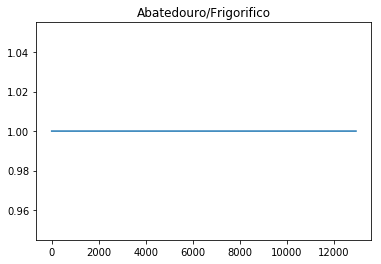

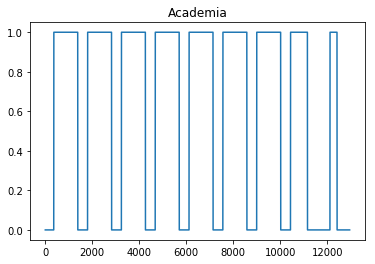

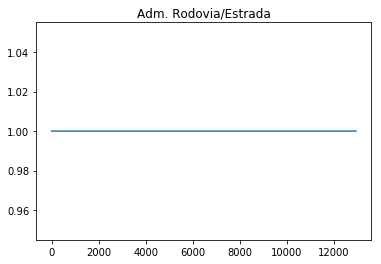

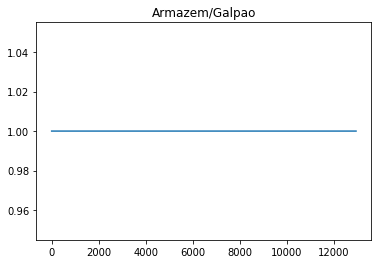

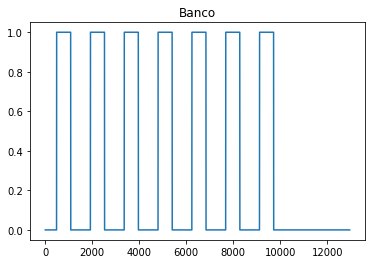

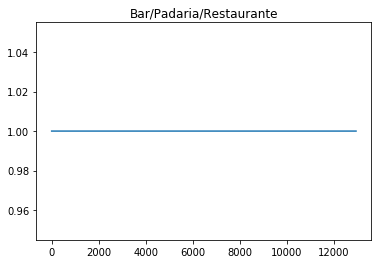

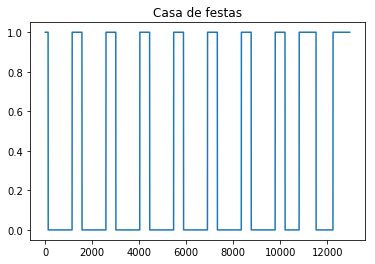

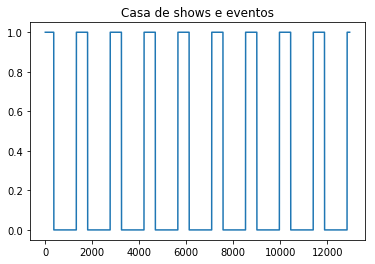

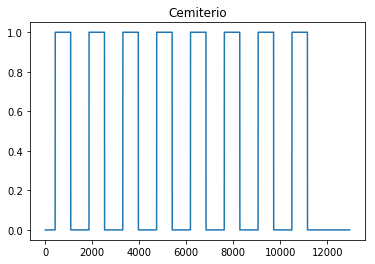

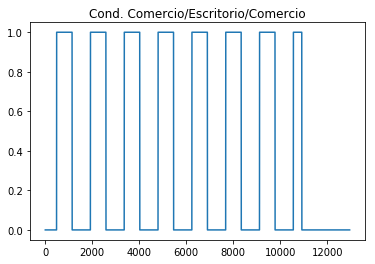

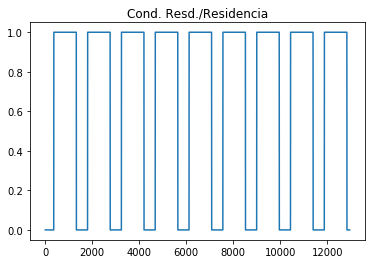

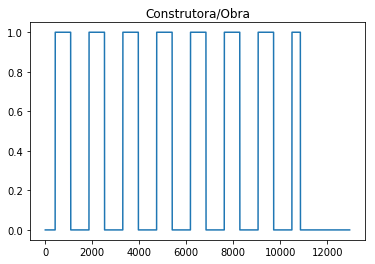

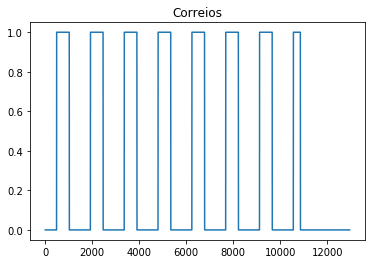

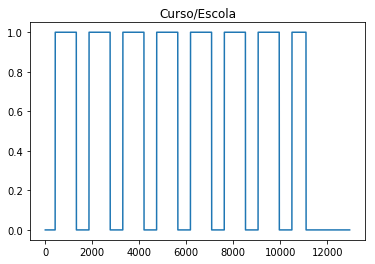

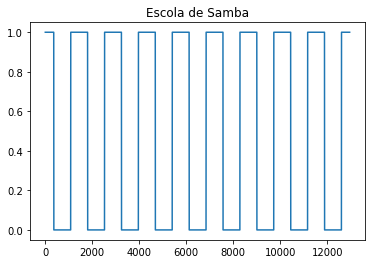

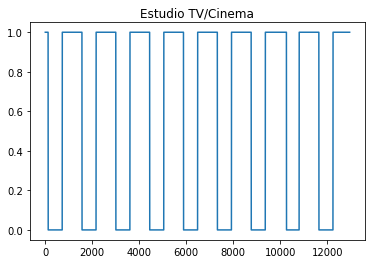

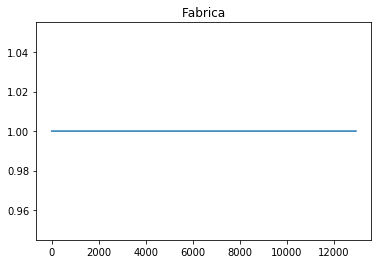

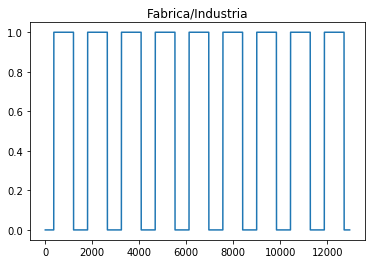

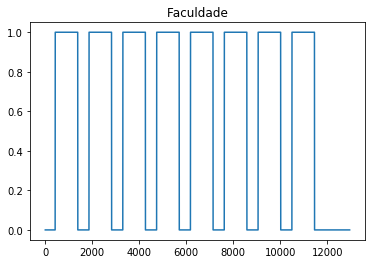

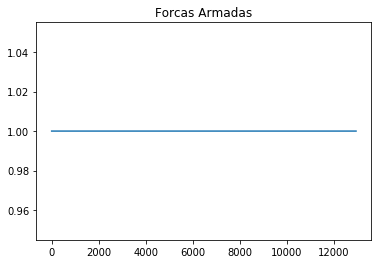

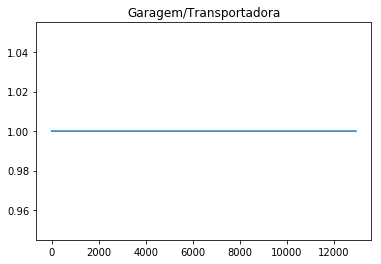

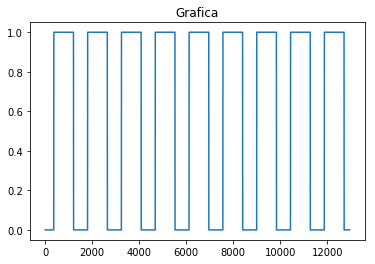

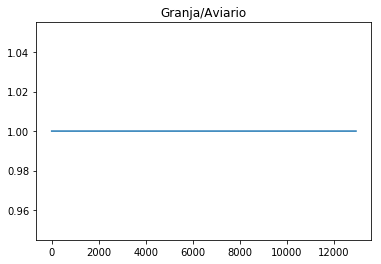

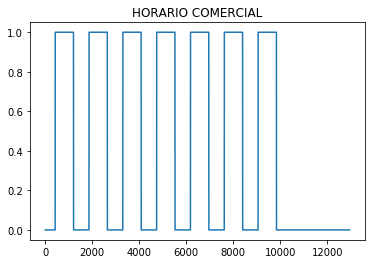

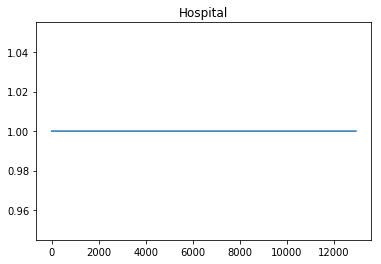

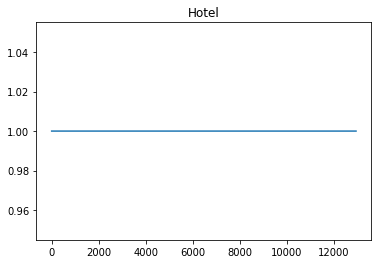

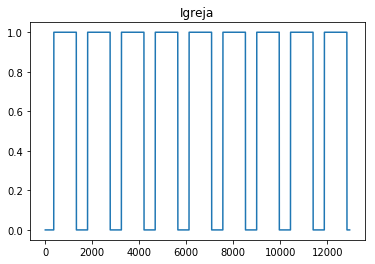

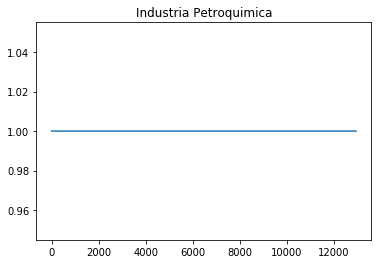

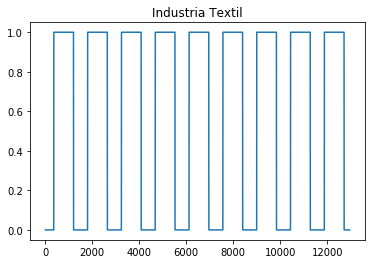

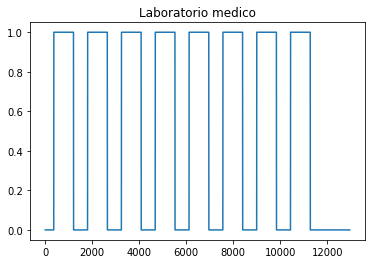

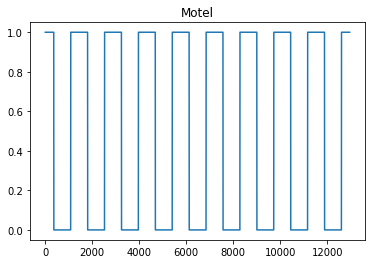

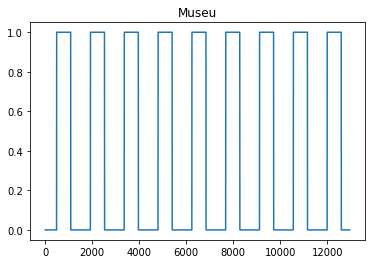

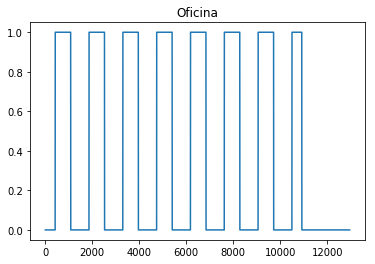

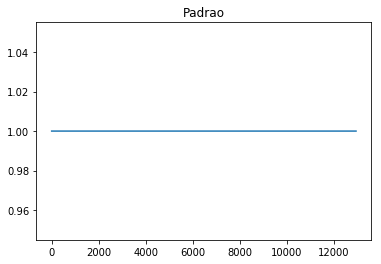

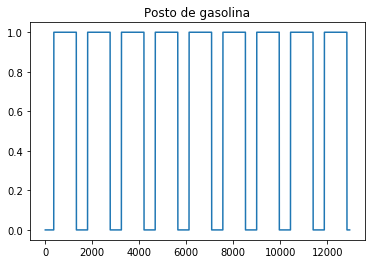

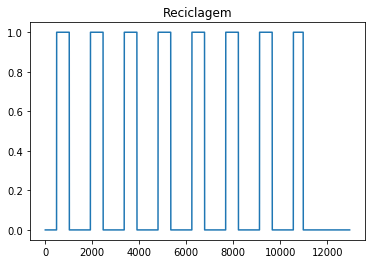

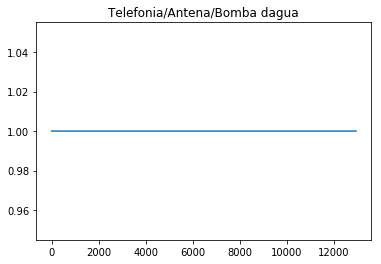

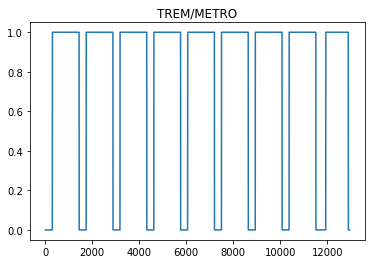

In [150]:
for n,(k,v) in enumerate(x.items()):
    f,ax = plt.subplots()
    ax.set_title(k)
    ax.plot(v)

KeyError: 0

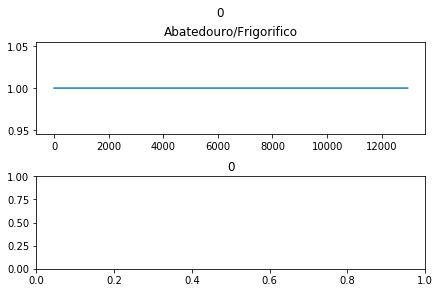

In [143]:
for n,(k,v) in enumerate(cats.items()):
    f,ax = plt.subplots(2,constrained_layout=True)
    f.suptitle(n)
    ax[0].set_title(k)
    ax[1].set_title(v)
    ax[0].plot(x[k])
    ax[1].plot(x[v])

### l______________________________________________________________________________________________________

# Lista de Setembro para clusters

In [30]:
#PERFIS_PATH = '/home/ubuntu/data/data/maio_2019/perfis.csv'
PERFIS_PATH = '/home/ubuntu/data/data/maio_2019/setembro/perfis_v2.csv'
perfis = pd.read_csv(PERFIS_PATH, sep=',')
sper = perfis.loc[:,'ramo_de_atividade_num']

In [31]:
rd = perfis[['ramo_de_atividade','ramo_de_atividade_num']].set_index('ramo_de_atividade').to_dict()['ramo_de_atividade_num']

In [32]:
sp = set(perfis.loc[:,'ramo_de_atividade'])

In [33]:
perfis['ramo_de_atividade'].isna().sum()

0

In [34]:
import re
c=0
remcar = {}
for i in sp:
    found = False
    for j in set(a2p.keys()):
        #print('----------------')
        c=0
        for k in range(min(len(i), len(j))):
            #print(i[k], j[k])
            if i[k] == j[k]:                   
                #print(c,'+')
                c+=1
        if c>10:
            found=True
            remcar[i]=j
            #print('match', i, j)
            continue       
        
    if not found:
        pass
        remcar[i] = i
        #print(i,j)

In [35]:
remcar['Seguran�a'] = 'Seguranca'

In [36]:
remcar['Minera��o'] = 'Mineracao'

In [37]:
remcar['Gr�fica']='Grafica'

In [38]:
len(remcar), len(sp)

(46, 46)

In [39]:
remcar

{'Sorveteria': 'Sorveteria',
 'Minera��o': 'Mineracao',
 'Poder P�blico Estadual': 'Poder Publico Federal',
 'Estudio TV/Cinema': 'Estudio TV/Cinema',
 'Gr�fica': 'Grafica',
 'Hotel': 'Hotel',
 'Lavanderia': 'Lavanderia',
 'Poder P�blico Federal': 'Poder Publico Federal',
 'Academia': 'Academia',
 'Correios': 'Correios',
 'Poder p�blico': 'Poder Publico Federal',
 'Telefonia/Antena/Bomba dagua': 'Telefonia/Antena/Bomba dagua',
 'Tecnologia': 'Tecnologia',
 'Hospital': 'Hospital',
 'Casa de festas': 'Casa de festas',
 'Transportes': 'Transportes',
 'F�brica de pl�sticos': 'Fabrica de plasticos',
 'Desconhecido': 'Desconhecido',
 'Casa de shows e eventos': 'Casa de shows e eventos',
 'Metalurgia': 'Metalurgia',
 'Armazem/Galp�o': 'Armazem/Galpao',
 'Comlurb': 'Comlurb',
 'Textil': 'Textil',
 'AVENIDA+PRES+VARGAS+595+CENTRO': 'AVENIDA+PRES+VARGAS+595+CENTRO',
 'Consumo pr�prio': 'Consumo proprio',
 'F�brica/Ind�stria': 'Fabrica/Industria',
 'Outra Atividade': 'Outra Atividade',
 'Publicid

In [40]:
perfis['ramo_de_atividade']=perfis.loc[:,'ramo_de_atividade'].map(remcar)

In [41]:
perfis['ramo_de_atividade'].isna().sum()

0

In [42]:
perfis[~perfis['ramo_de_atividade'].isin(a2p)]

,instalacao,id,cpf_cnpj,razao social,endereco_cadastro,ramo_de_atividade,ramo_de_atividade_num
400,BT2A414407935,414407935,14134854000175,FS 2011 PADARIA,CONFEITARIA,BAR E,32
732,BTI410447778,410447778,2408485000182,COMTEX INDUSTRIA E COMERCIO,NaN,AVENIDA+PRES+VARGAS+595+CENTRO,42


In [43]:
for i in p2a.keys():
    if i not in cats:
        print(i)

In [44]:
perfis.drop(columns=['ramo_de_atividade_num'],inplace=True)

In [45]:
perfis.columns

Index(['instalacao', 'id', 'cpf_cnpj', 'razao social', 'endereco_cadastro',
       'ramo_de_atividade'],
      dtype='object')

In [46]:
perfis.drop(columns=['cat'],inplace=True)

KeyError: "['cat'] not found in axis"

In [ ]:
perfis.insert(loc=6, value = perfis['ramo_de_atividade'].map(a2p).map(cats), column='cat')

In [47]:
perfis.cat.isna().sum()

AttributeError: 'DataFrame' object has no attribute 'cat'

In [48]:
perfis

,instalacao,id,cpf_cnpj,razao social,endereco_cadastro,ramo_de_atividade
0,BT2A400076589,400076589,29468063000159,PCRJ SECRETARIA MUNICIPAL,RUA+PE+JANUARIO+220+INHAUMA,Poder Publico Federal
1,BT2A400085952,400085952,29468063000159,PCRJ SECRETARIA MUNICIPAL,RUA++EMILIO DE MENEZES+230+PIEDADE,Poder Publico Federal
2,BT2A400086240,400086240,29468063000159,PCRJ SECRETARIA MUNICIPAL,AVENIDA++BRASIL+17879+IRAJA,Poder Publico Federal
3,BT2A400091987,400091987,29468063000159,PCRJ SECRETARIA MUNICIPAL,PRACA++ZUINARA+1+COLEGIO,Poder Publico Federal
4,BT2A400104752,400104752,29468063000159,PCRJ SECRETARIA MUNICIPAL,TRAVESSA++MANGUEIRA+1+CAJU,Poder Publico Federal
5,BT2A400104884,400104884,29468063000159,PCRJ SECRETARIA MUNICIPAL,RUA++CARLOS SEIDL+813+CAJU,Poder Publico Federal
6,BT2A400113506,400113506,29468063000159,PCRJ SECRETARIA MUNICIPAL,RUA++MARIA REGINA MARCONDES PINTO+1+BANGU,Poder Publico Federal
7,BT2A400114162,400114162,29468063000159,PCRJ SECRETARIA MUNICIPAL,PRACA+PROF+FERREIRA DE ABREU+1+BANGU,Poder Publico Federal
8,BT2A400120332,400120332,29468063000159,PCRJ SECRETARIA MUNICIPAL,AVENIDA++CANAL MARGEM DIREITA+1+SANTA CRUZ,Poder Publico Federal
9,BT2A400120898,400120898,29468063000159,PCRJ SECRETARIA MUNICIPAL,RUA++UM+1+SANTA CRUZ,Poder Publico Federal


In [49]:
perfis.to_csv('/home/ubuntu/data/data/maio_2019/setembro/perfis_v4.csv', sep=';')

### l______________________________________________________________________________________________________

### Pickles

In [ ]:
import pickle

In [ ]:
mkdir ../pickles/perfis/

In [ ]:
with open('../pickles/perfis/a2p.pkl','wb') as p:
    pickle.dump(a2p,p)

In [ ]:
with open('../pickles/perfis/p2a.pkl','wb') as p:
    pickle.dump(p2a,p)

In [ ]:
with open('../pickles/perfis/cats.pkl','wb') as p:
    pickle.dump(cats,p)

### l______________________________________________________________________________________________________

### Criar matriz de distâncias (Manhattan)

In [51]:
import pickle
with open('../../38_to_11.pkl','rb') as p:
    dict_38_to_11 = pickle.load(p)

In [80]:
for k,v in sorted(dict_38_to_11.items(), key = 
             lambda kv:(kv[1], kv[0])):
    print(k,v)
    print(len(x[k]))

Abatedouro/Frigorifico 0
12951
Adm. Rodovia/Estrada 0
12951
Armazem/Galpao 0
12951
Bar/Padaria/Restaurante 0
12951
Fabrica 0
12951
Forcas Armadas 0
12951
Garagem/Transportadora 0
12951
Granja/Aviario 0
12951
Hospital 0
12951
Hotel 0
12951
Industria Petroquimica 0
12951
Padrao 0
12951
Telefonia/Antena/Bomba dagua 0
12951
Banco 1
15833
Cemiterio 1
14392
Cond. Comercio/Escritorio/Comercio 1
14392
Construtora/Obra 1
14392
Correios 1
14392
HORARIO COMERCIAL 1
15833
Oficina 1
14392
Reciclagem 1
14392
Curso/Escola 2
14392
Faculdade 2
14392
Fabrica/Industria 3
12951
Grafica 3
12951
Industria Textil 3
12951
Laboratorio medico 3
14392
Museu 3
12951
Academia 4
12951
Casa de shows e eventos 4
8640
Cond. Resd./Residencia 5
12951
Igreja 5
12951
Posto de gasolina 5
12951
TREM/METRO 6
12951
Escola de Samba 7
12960
Motel 8
12960
Casa de festas 9
9000
Estudio TV/Cinema 10
15240


In [75]:
cluster = []
v_old = 0
i = 0
matrix_cluster = [[]]
list_cluster = []
for k,v in sorted(dict_38_to_11.items(), key = 
             lambda kv:(kv[1], kv[0])):
    print(k,v)
    if v_old == v:
        matrix_cluster[i] = x[k]
        i = i + 1
    else:
        list_cluster[v-1] = mean(matrix_cluster)
        i = 0
        matrix_cluster = [[]]
    v_old = v    

Abatedouro/Frigorifico 0
Adm. Rodovia/Estrada 0


IndexError: list assignment index out of range

In [ ]:
dict_38_to_11['Abatedouro/Frigorifico']

# FIM